# Abstract

This document attempts to make sense of New Zealand's crime data by correlating the number of apprehended offenders to their recorded gender, age group, and ethnicity. This paper also attempts to correlate immigration and crime.

Within the course of this document, the author will try to answer the following questions:
<br>(1) Can the distribution of offenders with respect to the age, gender, or ethnicity, determine the distribution in the different offences?
<br>(2) Can the answer to the above be extended to predict the frequencies of crimes given the population distribution?
<br>(3) Is the increase or decrease in criminal cases correlated to the fluctutation in immigration?
<br>(4) As a fun exercise, given the description of a crime, is it possible to guess the gender, ethnicity, and the age group an offender belongs to?

# Introduction

Finding an indicator to the fluctuation of criminal cases is a worthy endeavor -- for predicting a crime is synonymous to preventing a crime. Just imagine the overall benefit such an indicator will bring to the society. This, however, is too "Minority Report"-ish and the police undoubtedly has their own profiling tools and metrics.

This paper, on the other hand, is not an attempt to find a better replacement for these tools. The predictive tool this paper hopes to develop is not a tool to say, predict a person's probability to commit a certain crime. It may be an unexpectedly fun byproduct.

What this paper attempts to do is to understand the offenders in terms of the available data. The author tries to dissect the numbers into different categories and groupings. A better understanding of the population of the offenders can perhaps give us the proper perspective to deal with them and the insight to properly rehabilitate them.

As a fun attempt, the author will then apply the resulting predictive function to predict the information of criminals from the news here: http://www.stuff.co.nz/national/crime

# Challenges and Limitations
## Challenges

The author encountered both technical and non-technical difficulties throughout the duration of doing this project. Among these difficulties are:
<br>(1) Scraping data from a non-static web page: The source webpage is ASP. Hence, the author needs to write a python code that will dynamically interact with it. To accomplish this, Selenium was used. However, the Selenium drivers for the common browsers -- Mozilla, Chrome -- do not support 64-bit Windows. The author needed to use a headless web browser, PhantomJS (http://phantomjs.org/).
<br>(2) Web scraping takes longer than four hours. The author needs to leave the code executing overnight and add a code to save the data to csv file. Bugs in the code means further extending the execution and waiting time. Considering the schedule of the author, this means one day delay. It got more challenging when the data the author is downloading was down for one day.
<br>(3) Transforming the data takes a long time as well. As mentioned in the Methodology, category values are transposed into columns. Applied to over 200000 of data, this means a still lengthier execution time.
<br>(4) The author also needs to allot time to do his work, which, at times meant working on weekends. This gives him only week nights to work on this project. A bug on his code means almost a day lost. 

## Limitations

A big part of data analysis is playing with the data, searching for a pattern that may ultimately not exist. If there is no pattern, move on to the next data. This does not mix well with a project that has time-constraint and specific objectives. Add the fact that each step takes a long time, the author has been limited by time.

As for the available datasets, the dataset on crime, unfortunately, is not broken down into individual elements.

On the otherhand, the data on the population vs immigration is an estimate and also, with no starting point, it is difficult to find the actual percentage of the net migration vs the previous year. 

# Methodology

The data were obtained from the following locations:
<br>For the datasets related to crime:
<br>(1) http://nzdotstat.stats.govt.nz/wbos/Index.aspx?DataSetCode=TABLECODE7412
<br>(2) http://nzdotstat.stats.govt.nz/wbos/Index.aspx?DataSetCode=TABLECODE7403
<br><br>For the population/immigration dataset:
<br>(1) http://www.stats.govt.nz/infoshare/SearchPage.aspx

The first table is a monthly crime data for the last two months. The second table is an annual crime data from 1995 to 2014. The third table is the estimated annual population change with both natural and immigration components.

The author used Selenium and PhantomJS to do a webscrape on the first and third table and downloaded a CSV version of the second table.

To make sense of the datasets, which mostly contain categorical data, the author transposed the values into columns. Percentage was also calculated to be able to handle the change in the population size.

# Data Acquisition and Preparation

In [1]:
# Import the python libraries
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import os.path
import pandas as pd
import seaborn as sns
from pylab import rcParams
from sklearn.neighbors import KNeighborsClassifier

# Import my python files
from p2_phantomjs_selenium_util import *
from p2_table2_cleaner import *
from P2_table1_cleaner import *

%matplotlib inline

In [2]:
if os.path.exists('../datasets/project2_web_scrape.csv'):
    # The web scraping takes time -- more than 4 hours
    # If we've already ran this before, just use the saved csv file
    table_1 = pd.read_csv('../datasets/project2_web_scrape.csv', index_col=0)
else:
    driver = init_and_get_driver("http://nzdotstat.stats.govt.nz/wbos/Index.aspx?DataSetCode=TABLECODE7403")
    columns = get_column_headers(driver)
    table_1 = do_web_scrape(columns)
    table_1.to_csv('../datasets/project2_web_scrape_annual_apprehension.csv')

In [3]:
if os.path.exists('../datasets/project2_population_change_vs_migration.csv'):
    # If we've already ran this before, just use the saved csv file
    pop_migration = pd.read_csv('../datasets/project2_population_change_vs_migration.csv')
else:
    driver = init_and_get_driver("http://www.stats.govt.nz/infoshare/SearchPage.aspx")
    pop_migration = get_population_data(driver)
    pop_migration.to_csv('../datasets/project2_population_change_vs_migration.csv')

In [4]:
# Table 1: Monthly data for the past two months
table_1 = transform_table1_data(table_1)
# Table 2: Annual data starting from 1995 until 2014
# The raw table is needed for visualizing later
# The non-raw table will be cleaned up and used for predictive modeling
table_2_raw = transform_table2_data_raw(pd.read_csv('../datasets/annual_crime_components.csv', index_col=0))
table_2 = transform_table2_data(pd.read_csv('../datasets/annual_crime_components.csv', index_col=0))

Unfortunately, inspecting the table_1 data reveals a fishy distribution of the category data. The data is evenly distributed. Thus, table_1 will not be used further. 

In [5]:
table_1.head()

Ages 0 to 4 years inclusive    Ages 10 to 14 years inclusive  \
Year                                                                     
201506                            256                              256   
201507                            256                              256   
201508                            256                              256   
201509                            256                              256   
201510                            256                              256   

          Ages 15 to 19 years inclusive    Ages 20 to 24 years inclusive  \
Year                                                                       
201506                              256                              256   
201507                              256                              256   
201508                              256                              256   
201509                              256                              256   
201510                              256                              256   

          Ages 25 to 29 years inclusive    Ages 30 to 34 years inclusive  \
Year                                                                       
201506                              256                              256   
201507                              256                              256   
201508                              256                              256   
201509                              256                              256   
201510                              256                              256   

          Ages 35 to 39 years inclusive    Ages 40 to 44 years inclusive  \
Year                                                                       
201506                              256                              256   
201507                              256                              256   
201508                              256                              256   
201509                              256                              256   
201510                              256                              256   

          Ages 45 to 49 years inclusive    Ages 5 to 9 years inclusive  \
Year                                                                     
201506                              256                            256   
201507                              256                            256   
201508                              256                            256   
201509                              256                            256   
201510                              256                            256   

          ...      PropertyDamage  PublicDisorder  Robbery  Sexual  Theft  \
Year      ...                                                               
201506    ...                4890           10710     1068    1848  12378   
201507    ...                4800           10359     1074    1800  12255   
201508    ...                4734           10245     1107    1839  12048   
201509    ...                4728           10302     1107    1809  11928   
201510    ...                4698           10242     1104    1791  11760   

        Traffic  Trespassing    Age  Gender  Ethnicity  
Year                                                    
201506    21384         3780  34816    2176      15232  
201507    21141         3786  34816    2176      15232  
201508    20946         3750  34816    2176      15232  
201509    20595         3705  34816    2176      15232  
201510    20412         3636  34816    2176      15232  

[5 rows x 43 columns]

This leaves us with table_2.

In [6]:
table_2.head()

10 to 13  14 to 16  17 to 20  21 to 30  31 to 50  51 or older  Female  \
Year                                                                          
1995        12        17        18        20        20           10      40   
1996        12        17        18        20        20           11      40   
1997        12        17        18        20        20           11      40   
1998        11        16        18        20        20           11      40   
1999        11        16        19        20        20           11      40   

      Male  Asiatic  Caucasian     ...       Homicide  IllegalWeapon  Injure  \
Year                               ...                                         
1995    59        9         32     ...              0             26     134   
1996    59       10         32     ...              0             24     122   
1997    59       10         31     ...              0             29     126   
1998    59       10         31     ...              0             30     124   
1999    59       10         32     ...              0             29     124   

      Miscellaneous  PropertyDamage  PublicDisorder  Robbery  Sexual  Theft  \
Year                                                                          
1995              8              82             146        5       8    227   
1996             10              79             145        5       7    241   
1997              9              81             152        6       7    210   
1998             10              83             163        6       6    202   
1999             13              82             164        5       5    204   

      Trespassing  
Year               
1995           69  
1996           62  
1997           69  
1998           62  
1999           61  

[5 rows x 28 columns]

Let's add the migration data into this table. What we want to do is to add the net migration data and see if the we can find the correlation by shifting the year. The idea is that, the impact of migration is possibly not immediate and may take a few years to have a visible effect.

Below we will add data from 1995-2014, 1994-2013, 1993-2012, and 1992-2011.

In [7]:
pop_migration.drop('Unnamed: 0', inplace=True, axis=1)
pop_migration.head()

Year  PopulationChange  PercentPopulationChange  NaturalIncrease  \
0  1992             36600                     1.05            33000   
1  1993             40500                     1.15            31800   
2  1994             47800                     1.34            31000   
3  1995             53400                     1.47            30700   
4  1996             58600                     1.59            29100   

   NetMigration  
0          3600  
1          8700  
2         16800  
3         22700  
4         29500

In [8]:
table_2 = table_2.assign(NetMigration=list(pop_migration['NetMigration'][3:23]))
table_2 = table_2.assign(NetMigrationS1=list(pop_migration['NetMigration'][2:22]))
table_2 = table_2.assign(NetMigrationS2=list(pop_migration['NetMigration'][1:21]))
table_2 = table_2.assign(NetMigrationS3=list(pop_migration['NetMigration'][0:20]))
table_2.drop('Homicide', inplace=True, axis=1)

The table_2 dataframe contains the yearly percentage distribution of the offenders across the three different categories. The offences are the frequency distribution per 1000 registered offence. The 1000 is used so that the offences with relatively low distribution will still show a non-zero value. 'Homicide' was removed because it has negligible values.

# Data Analysis

The first step is to find the correlations in our dataset. Since we have many columns, it will be difficult to use scatter_matrix on this. We will not be able to identify the graphs properly.

It is still better to use the correlation table and visually check the values.  

In [9]:
table_2.drop(['Female', 'Male'], axis=1).corr().filter(table_2.columns[13:27]).drop(table_2.columns[13:27])

Abduction  AgainstGovernment     Drugs  EndangeringOthers  \
10 to 13        -0.814681          -0.528099  0.511488           0.463564   
14 to 16        -0.823629          -0.477201  0.238365           0.392972   
17 to 20        -0.413800           0.090846  0.376304          -0.092136   
21 to 30         0.269870          -0.062158 -0.238450           0.092136   
31 to 50         0.538085          -0.055449 -0.254699          -0.056237   
51 or older      0.937818           0.524796 -0.601096          -0.372038   
Asiatic          0.507078           0.678222 -0.462215          -0.212853   
Caucasian       -0.860414          -0.654585  0.564368           0.510599   
Indian           0.773627           0.478136 -0.660395          -0.460678   
Maori           -0.606894          -0.555081  0.504354           0.201816   
Pacific Isle     0.139755          -0.067728 -0.199186          -0.210501   
NetMigration     0.058761          -0.138955 -0.375745           0.162830   
NetMigrationS1  -0.154947          -0.194089 -0.253121           0.301358   
NetMigrationS2  -0.169313          -0.109211 -0.096286           0.163382   
NetMigrationS3  -0.105340           0.062727 -0.029092          -0.258471   

                   Fraud  IllegalWeapon    Injure  Miscellaneous  \
10 to 13        0.856997      -0.606482 -0.829670       0.529613   
14 to 16        0.753808      -0.285626 -0.641423       0.299309   
17 to 20        0.127595      -0.040180 -0.405113       0.131579   
21 to 30       -0.238810       0.040180  0.323981      -0.210526   
31 to 50       -0.416237       0.122624  0.599934      -0.321246   
51 or older    -0.853218       0.383491  0.841757      -0.463687   
Asiatic        -0.525013       0.241346  0.212508       0.194544   
Caucasian       0.859821      -0.486581 -0.732152       0.421308   
Indian         -0.746174       0.441985  0.799810      -0.486842   
Maori           0.637158      -0.264037 -0.480549       0.138343   
Pacific Isle   -0.110697       0.312118  0.358950      -0.601233   
NetMigration    0.188985      -0.020017  0.005677       0.314331   
NetMigrationS1  0.246529       0.020363 -0.176450       0.282113   
NetMigrationS2  0.063174       0.249628 -0.117235      -0.192228   
NetMigrationS3 -0.093128       0.515399  0.019262      -0.328954   

                PropertyDamage  PublicDisorder   Robbery    Sexual     Theft  \
10 to 13             -0.343047       -0.891269 -0.549751 -0.563808  0.861801   
14 to 16             -0.132635       -0.647162 -0.177444 -0.516443  0.634998   
17 to 20              0.198752       -0.136846 -0.124810 -0.521190  0.096190   
21 to 30             -0.085180        0.464359 -0.028802  0.426428 -0.302050   
31 to 50             -0.304518        0.521776  0.064460  0.780834 -0.388543   
51 or older           0.270991        0.864488  0.426440  0.527583 -0.802686   
Asiatic               0.573481        0.460060  0.235106 -0.160541 -0.486054   
Caucasian            -0.510346       -0.846985 -0.569497 -0.353343  0.860281   
Indian                0.440094        0.778130  0.652851  0.363254 -0.776263   
Maori                -0.442461       -0.722662 -0.365918 -0.117622  0.682555   
Pacific Isle         -0.042628        0.019099  0.399211  0.440218 -0.038914   
NetMigration         -0.199754       -0.178877  0.040674  0.329024  0.242205   
NetMigrationS1       -0.173139       -0.060200  0.132474 -0.216649  0.224241   
NetMigrationS2       -0.030575        0.093728  0.334701 -0.275102  0.125734   
NetMigrationS3        0.141632        0.064309  0.430019 -0.077486 -0.005689   

                Trespassing  
10 to 13           0.764157  
14 to 16           0.623113  
17 to 20           0.412245  
21 to 30          -0.282063  
31 to 50          -0.516486  
51 or older       -0.684964  
Asiatic           -0.180450  
Caucasian          0.556674  
Indian            -0.574974  
Maori              0.427734  
Pacific Isle      -0.109056  
NetMigration      -0.183564  
NetMigrationS1     0.05

The correlation table above should be interpreted in two ways. First is via the original categories - Age Group and Ethnicity. Second is via the immigration pattern.

## Data Analysis Based on Age and Ethnicity

Based on the correlation table, the highest positive correlations belongs to the following pairs:
<br><b>Age Group</b>
<br>(1) '10 to 13': Fraud(0.86), Theft(0.86), Trespassing(0.76), Drugs(0.5)
<br>(2) '14 or 16': Fraud(0.75), Theft(0.63), Trespassing(0.62)
<br>(3) '17 to 20': N/A
<br>(4) '21 to 30': N/A
<br>(5) '31 to 50': Abduction(0.53), Injure(0.60), Public Disorder(0.52), Sexual(0.78)
<br>(6) '51 or older': Abduction(0.93), Against Government (0.52), Injure(0.84), Public Disorder(0.86), Sexual(0.52)
<br><br><b>Ethnicity</b>
<br>(1) 'Asiatic': Abduction(0.51), Against Government(0.68), Property Damage(0.57)
<br>(2) 'Caucasian': Fraud(0.86), Theft(0.86), Trespassing(0.56)
<br>(3) 'Indian': Abduction(0.77), Injure(0.80), Public Disorder(0.78), Robbery(0.65)
<br>(4) 'Maori': Drugs(0.50), Fraud(0.64), Theft(0.68)
<br>(5) 'Pacific Isle': N/A

Do note that the data represents the percentage belonging in each group, i.e., the percentage of the offenders belonging to the '10 to 13' group versus the total; the percentage of the offenders with Asiatic origin versus the total, etc. 

It is interesting to see that the adjacent age groups are somewhat related. That is, the '10 to 13' and '14 to 16' age groups are both strongly correlated to Fraud, Theft, and Trespassing. The '31 to 50' and '51 or older' age groups are correlated with Abduction, Acts Intending to Injure, Public Disorder and Sexual Asault related offences. 

The first observation makes sense -- since the offenders are young, their offences tend to gravitate towards the relatively minor offences, like Trespassing.

Meanwhile, the offences of the two older groups tend to gravitate towards the more serious offences. Perhaps this has got to do with alcohol consumption? Drugs perhaps? It will be interesting to do a deeper study correlating this with other data, e.g. alcohol/drugs consumption, and the places where such offences frequently happen.

As for ethnicity, the highest correlation belongs to the Caucasian and Fraud, Caucasian and Theft, Indian and Abduction, Indian and Acts Intending to Injure, Indian and Public Disorder. It will be great to correlate this with datasets for the victims. This will perhaps give a better story.

What does this correlation really indicate? This does not mean that there are more crimes committed by a certain group or groups. Rather, it simply means that if an offender who falls in a certain category is caught, it is most likely that the offence is related to the ones with which the category has the highest correlation.

### Data Plots

Let's select a few graphs to see this correlations.

In [10]:
sns.set(style="ticks")
rcParams['figure.dpi'] = 100
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['patch.edgecolor'] = 'white'
rcParams['font.family'] = 'StixGeneral'
rcParams['figure.figsize'] = 15,5
rcParams['font.size'] = 12
rcParams['axes.labelsize'] = 'medium'
rcParams['xtick.labelsize'] = 12
rcParams['ytick.labelsize'] = 12

#### 51 and Older

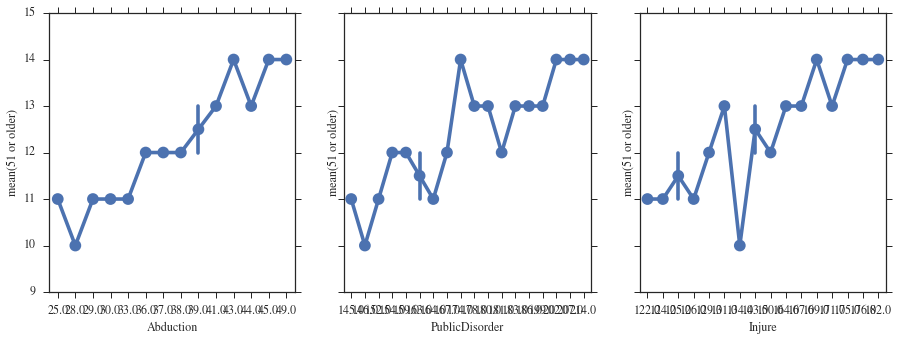

In [11]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True)
sns.pointplot(y='51 or older', x='Abduction', ax=ax1, data=table_2)
sns.pointplot(y='51 or older', x='PublicDisorder', ax=ax2, data=table_2)
sns.pointplot(y='51 or older', x='Injure', ax=ax3, data=table_2)

#### Indian Ethnicity vs Abduction, Acts with Intent to Injure, Public Disorder, and Robbery

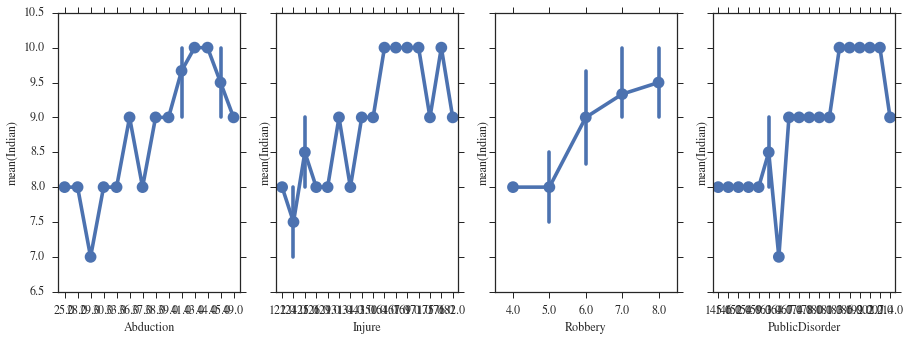

In [12]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, sharey=True)
sns.pointplot(y='Indian', x='Abduction', ax=ax1, data=table_2)
sns.pointplot(y='Indian', x='Injure', ax=ax2, data=table_2)
sns.pointplot(y='Indian', x='Robbery', ax=ax3, data=table_2)
sns.pointplot(y='Indian', x='PublicDisorder', ax=ax4, data=table_2)

## Data Analysis Based on Immagration

There is no really strong correlation here. The highest correlation is with NetMigrationS3 (1992-2011) and Illegal Weapon. However, if you look at the trend, you can see an increase in the correlation with Illegal Weapon as the NetMigration is shifted. Perhaps it means that the immigrants, as they settle better here, they learn the need to arm themselves for protection and thus the need to possess illegal weapons? Or perhaps, they found it difficult to improve economically so they are opting for more drastic measures, and hence, they acquire illegal weapons to use for illegal activities? 

If you look into the trend in the increase in correlation with robbery as the time is shifted, it is interesting to look at this whole picture with possession of illegal weapons. The second theory above suddenly becomes much more interesting. Are the illegal weapons being used to execute robbery? If so, why is there a positive correlation between robbery and net migration? Perhaps finding that life in New Zealand is not as they expected it to be, they are forced to rob? Or perhaps they are not the offenders, but they are the victims? 

This should be studied side-by-side with the data on Satisfaction (quality of life). There is also a dataset for victims, which can be studied parallel to this one.

It will also be useful to do another time shift to see if this trend holds.

It is also interesting to note that the only intersection of the two analyses is with Robbery. Offenders with Indian origin and the time effect of the Net Migration both has positive correlation with robbery.

The data plot below shows the Net Migration correlation with Possession of Illegal Weapon and Robbery.

### Data Plot: Net Migration vs Possession of Illegal Weapon and Robbery

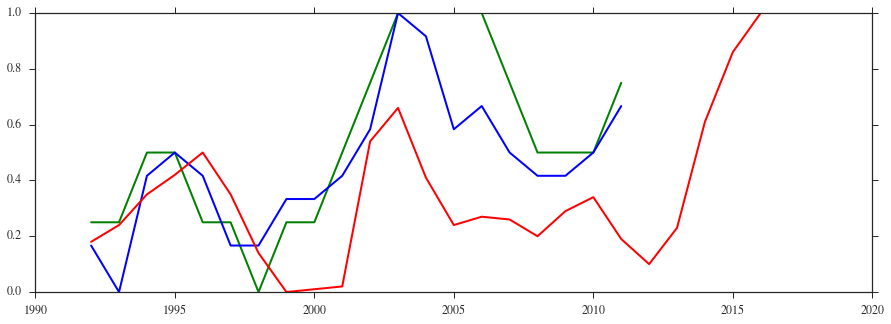

In [13]:
rcParams['figure.figsize'] = 15,5
def shift_year(x, shift):
    return x - shift
crime = table_2.copy(deep=True)
crime.reset_index(inplace=True)
plt.plot(crime['Year'].apply(shift_year, args=[3]), normalize(crime['Robbery']), 'g')
plt.plot(crime['Year'].apply(shift_year, args=[3]), normalize(crime['IllegalWeapon']), 'b')
plt.plot(pop_migration.Year, normalize(pop_migration['NetMigration']), 'r')

# Predictive Modeling



## Based on Categories

### Predictive Model 1

Given the percentage of the offenders under '51 or Older' and percentage with 'Indian' as ethnicity, predict the number of cases under Abduction, Acts Intending to Injure, and Public Disorder.   

In [14]:
vector_input = table_2[['51 or older', 'Indian']]

r_squarel, k = determine_best_k(vector_input.values, table_2.Abduction.values)
print 'Best K: ', k
predictor_abduction = KNeighborsClassifier(n_neighbors=3, metric='euclidean', weights='distance')
predictor_abduction.fit(vector_input, table_2.Abduction)

r_squarel, k = determine_best_k(vector_input.values, table_2.Injure.values)
print 'Best K: ', k
predictor_injure = KNeighborsClassifier(n_neighbors=3, metric='euclidean', weights='distance')
predictor_injure.fit(vector_input, table_2.Injure)

r_squarel, k = determine_best_k(vector_input.values, table_2.PublicDisorder.values)
print 'Best K: ', k
predictor_disorder = KNeighborsClassifier(n_neighbors=3, metric='euclidean', weights='distance')
predictor_disorder.fit(vector_input, table_2.PublicDisorder)

Best K:  17
Best K:  6
Best K:  7


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_neighbors=3, p=2, weights='distance')

By using the best 'K' we will be able to follow the actual data but it does not do prediction properly. We will settle with k = 3.

In [16]:
temp = pd.DataFrame(columns=['51 or older', 'Indian', 'Abduction(per 1000)'])
for i in range(101):
    for j in range(101):
        temp.loc[i * 100 + j] = [Decimal(i), Decimal(j), Decimal(predictor_abduction.predict([i, j])[0])]

In [18]:
temp

51 or older Indian Abduction(per 1000)
0               0      0                  28
1               0      1                  28
2               0      2                  28
3               0      3                  28
4               0      4                  28
5               0      5                  28
6               0      6                  28
7               0      7                  28
8               0      8                  28
9               0      9                  28
10              0     10                  28
11              0     11                  28
12              0     12                  28
13              0     13                  28
14              0     14                  28
15              0     15                  28
16              0     16                  28
17              0     17                  28
18              0     18                  28
19              0     19                  28
20              0     20                  28
21              0     21                  28
22              0     22                  28
23              0     23                  41
24              0     24                  41
25              0     25                  41
26              0     26                  41
27              0     27                  41
28              0     28                  41
29              0     29                  41
...           ...    ...                 ...
10071         100     71                  45
10072         100     72                  45
10073         100     73                  45
10074         100     74                  45
10075         100     75                  45
10076         100     76                  45
10077         100     77                  45
10078         100     78                  45
10079         100     79                  45
10080         100     80                  45
10081         100     81                  45
10082         100     82                  45
10083         100     83                  45
10084         100     84                  45
10085         100     85                  45
10086         100     86                  45
10087         100     87                  45
10088         100     88                  45
10089         100     89                  45
10090         100     90                  45
10091         100     91                  45
10092         100     92                  45
10093         100     93                  45
10094         100     94                  45
10095         100     95                  45
10096         100     96                  43
10097         100     97                  43
10098         100     98                  43
10099         100     99                  43
10100         100    100                  43

[10101 rows x 3 columns]

### Predictive Model 2

In [19]:
# create X (features) three different ways
vector_input = table_2[['Caucasian']]

r_squarel, k = determine_best_k(vector_input.values, table_2.Fraud.values)
predictor_fraud = KNeighborsClassifier(n_neighbors=k, metric='euclidean', weights='distance')
predictor_fraud.fit(vector_input, table_2.Fraud)

r_squarel, k = determine_best_k(vector_input.values, table_2.Theft.values)
predictor_theft = KNeighborsClassifier(n_neighbors=k, metric='euclidean', weights='distance')
predictor_theft.fit(vector_input, table_2.Theft)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_neighbors=1, p=2, weights='distance')

In [20]:
temp = pd.DataFrame(columns=['Caucasian', 'Fraud(per 1000)', 'Theft(per 1000)'])
last_fraud = 0
last_theft = 0
for i in range(1000):
    fraud = Decimal(predictor_fraud.predict([i])[0])
    theft = Decimal(predictor_theft.predict([i])[0])
    if (last_fraud != fraud) or (last_theft != theft):
        last_fraud = fraud
        last_theft = theft
        print 'Caucasian(%):', i, 'Fraud(per 1000):', fraud, 'Theft(per 1000):', theft

Caucasian(%): 0 Fraud(per 1000): 31 Theft(per 1000): 201
Caucasian(%): 30 Fraud(per 1000): 36 Theft(per 1000): 203
Caucasian(%): 31 Fraud(per 1000): 59 Theft(per 1000): 210
Caucasian(%): 32 Fraud(per 1000): 69 Theft(per 1000): 227


## Based on Net Migration

Predict the effect of the migration to the number of Illegal Weapon and Robbery related offences. This is based on 1000 offences.

In [1]:
vector_input = table_2[['NetMigrationS3']]
r_squarel, k = determine_best_k(vector_input.values, table_2.IllegalWeapon.values)
print 'Best K: ', k
predictor_illegal_weapon = KNeighborsClassifier(n_neighbors=3, metric='euclidean', weights='distance')
predictor_illegal_weapon.fit(vector_input, table_2.IllegalWeapon)

r_squarel, k = determine_best_k(vector_input.values, table_2.Robbery.values)
print 'Best K: ', k
predictor_robbery = KNeighborsClassifier(n_neighbors=3, metric='euclidean', weights='uniform')
predictor_robbery.fit(vector_input, table_2.Robbery)

NameError: name 'table_2' is not defined

In [22]:
last_weapon = 0
last_robbery = 0
for value in range(-1000, 100000, 10):
    weapon = Decimal(predictor_illegal_weapon.predict([value])[0])
    robbery = Decimal(predictor_robbery.predict([value])[0])
    if weapon != last_weapon or robbery != last_robbery:
        last_weapon = weapon
        last_robbery = robbery
        print 'Net Migration:', value, 'Possession of Illegal Weapon:', weapon, 'Robbery:', robbery

Net Migration: -1000 Possession of Illegal Weapon: 26 Robbery: 4
Net Migration: 2610 Possession of Illegal Weapon: 26 Robbery: 5
Net Migration: 3760 Possession of Illegal Weapon: 32 Robbery: 5
Net Migration: 4300 Possession of Illegal Weapon: 29 Robbery: 5
Net Migration: 6100 Possession of Illegal Weapon: 29 Robbery: 6
Net Migration: 6300 Possession of Illegal Weapon: 29 Robbery: 5
Net Migration: 6660 Possession of Illegal Weapon: 31 Robbery: 5
Net Migration: 8650 Possession of Illegal Weapon: 24 Robbery: 5
Net Migration: 9410 Possession of Illegal Weapon: 30 Robbery: 5
Net Migration: 10410 Possession of Illegal Weapon: 32 Robbery: 5
Net Migration: 10610 Possession of Illegal Weapon: 32 Robbery: 6
Net Migration: 11600 Possession of Illegal Weapon: 29 Robbery: 6
Net Migration: 14510 Possession of Illegal Weapon: 30 Robbery: 6
Net Migration: 16650 Possession of Illegal Weapon: 26 Robbery: 6
Net Migration: 19250 Possession of Illegal Weapon: 26 Robbery: 5
Net Migration: 19410 Possession o

Predicting the illegal weapon and robbery related offences that will happen in 2016, 2017 and 2018:

In [23]:
predicted_net_migration_2015_2016 = list(pop_migration[pop_migration.Year >= 2015].NetMigration)
for year in [2014, 2015, 2016]:
    net_migration = list(pop_migration[pop_migration.Year == year].NetMigration)[0]
    weapons = Decimal(predictor_illegal_weapon.predict(net_migration)[0])
    robbery = Decimal(predictor_robbery.predict(net_migration)[0])
    print 'Year:',year + 2,'Net Migration:',net_migration,'Possession of Illegal Weapon:', weapons, 'Robbery:', robbery
    

Year: 2016 Net Migration: 38300 Possession of Illegal Weapon: 36 Robbery: 5
Year: 2017 Net Migration: 58300 Possession of Illegal Weapon: 36 Robbery: 5
Year: 2018 Net Migration: 69100 Possession of Illegal Weapon: 36 Robbery: 5


# Conclusion

Based on the datasets on offenders, the author found out that there is a correlation between some of the categorical data vs some of the offences. This means that, in a given population of offenders, if we know the number of individuals under a given category, be it age group or ethnicity, we can figure out the number of cases for some of the offences. This does not say that in the general population, the group of people falling in a category will most likely commit a particular offence.

It will be interesting to test this with real data. One idea that the author wanted to explore is to figureout the age group and ethnicity of the offenders reported here: http://www.stuff.co.nz/national/crime.

However, it is not easy to verify as there is no way to confirm if the prediction is correct.

A few articles give a good example of these correlations:
(1) Asian (Abduction: 0.51) sentenced with kidnapping: http://www.stuff.co.nz/national/crime/670808/Cina-Ma-kidnap-accused-appears-in-court
(2) '31 to 50' (Sexual : 0.78) year old male found guilty of indecent assault: http://www.stuff.co.nz/national/crime/83855110/terry-loughnan-found-guilty-of-two-historic-indecent-assaults-on-friends

The data and graph on net migration show that there is a correlation between net migration and possession of illegal weapon and robbery related offences. This is seen visually by plotting the net migration data vs the said offences. The graphs look similar, but time shifted. That means, the net migration has an effect after two years on the number of these two offences. Indeed it is easy to find an explanation for this, as the author pointed out in the analysis. It will be interesting to get more data to explore this, including comparative analysis of other datasets (economic vs immigration, quality of life, etc).


In [24]:
%%javascript
require(['base/js/utils'],
function(utils) {
   utils.load_extensions('calico-spell-check', 'calico-document-tools', 'calico-cell-tools');
});

<IPython.core.display.Javascript object>